In [49]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('processed_steam_games.csv', index_col=0)
df

,title,genre,normalized_description
20200,Galactic Bowling,Sports,"['galactic', 'bowling', 'exaggerated', 'styliz..."
655370,Train Bandit,Action,"['law', 'look', 'showdown', 'atop', 'train', '..."
1732930,Jolt Project,Strategy,"['jolt', 'project', 'army', 'new', 'robotic', ..."
1355720,Henosis™,Adventure,"['henosis', 'mysterious', '2d', 'platform', 'p..."
1139950,Two Weeks in Painland,Adventure,"['game', 'play', 'hacker', 'arrange', 'deal', ..."
...,...,...,...
2669080,Mannerheim's Saloon Car,Simulation,"['marshal', 'mannerheim', 'saloon', 'car', 'tr..."
2736910,Beer Run,Casual,"['beer', 'run', 'indie', 'game', 'create', 'st..."
2743220,My Friend The Spider,Simulation,"['small', 'horror', 'narrative', 'game', 'isol..."
2293130,Path of Survivors,RPG,"['path', 'survivor', 'multi', 'class', 'auto',..."


In [19]:
# define paths
main_directory = 'images'
train_directory = f'{main_directory}/train'
validation_directory = f'{main_directory}/validation'

# define image size
image_size = (460, 215)

# define batch size
batch_size = 32

In [20]:
# setup training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 60619 images belonging to 8 classes.


In [57]:
# set up validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 15157 images belonging to 8 classes.


In [32]:
# define a CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [33]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [34]:
# train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    verbose=1,
)

Epoch 1/25
1894/1894 [==============================] - 1337s 706ms/step - loss: 1.9631 - accuracy: 0.2263 - val_loss: 1.9331 - val_accuracy: 0.2313
Epoch 2/25
1894/1894 [==============================] - 1334s 704ms/step - loss: 1.9315 - accuracy: 0.2297 - val_loss: 1.9228 - val_accuracy: 0.2361
Epoch 3/25
1894/1894 [==============================] - 1333s 704ms/step - loss: 1.9256 - accuracy: 0.2317 - val_loss: 1.9165 - val_accuracy: 0.2346
Epoch 4/25
1894/1894 [==============================] - 1330s 702ms/step - loss: 1.9224 - accuracy: 0.2323 - val_loss: 1.9136 - val_accuracy: 0.2347
Epoch 5/25
1894/1894 [==============================] - 1331s 703ms/step - loss: 1.9209 - accuracy: 0.2334 - val_loss: 1.9161 - val_accuracy: 0.2398
Epoch 6/25
1894/1894 [==============================] - 1330s 702ms/step - loss: 1.9187 - accuracy: 0.2349 - val_loss: 1.9136 - val_accuracy: 0.2358
Epoch 7/25
1894/1894 [==============================] - 1329s 701ms/step - loss: 1.9167 - accuracy: 0.2349

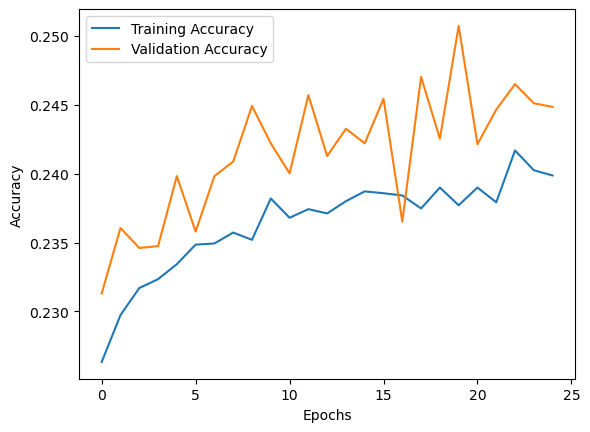

In [42]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
# save the model
model.save('CNN_model.keras')